In [1]:
%matplotlib inline

# Need to install geopandas and pysal using conda

import pandas as pd
import numpy as np
import geopandas

pd.options.display.max_rows = 10

In [2]:
divisions = geopandas.read_file("zip://./datasets/pd_divisions_datasd.zip")
beats = geopandas.read_file("zip://./datasets/pd_beats_datasd.zip")

distribution = pd.read_csv('./datasets/gis_police_distribution.csv')

In [3]:
divisions

,objectid,div_num,div_name,geometry
0,1,1,NORTHERN,"POLYGON ((6257399.473922551 1913720.405154973,..."
1,2,2,NORTHEASTERN,"POLYGON ((6329136.046000302 1985638.385990649,..."
2,3,3,EASTERN,"POLYGON ((6321693.529061213 1885496.922888145,..."
3,4,5,CENTRAL,"POLYGON ((6287304.000071391 1850636.00015606, ..."
4,5,6,WESTERN,"POLYGON ((6280788.357918963 1873275.705860808,..."
5,6,7,SOUTHERN,"POLYGON ((6294084.232901976 1801858.102961391,..."
6,7,8,MID-CITY,"POLYGON ((6300695.999862134 1863112.000138387,..."
7,8,9,NORTHWESTERN,"POLYGON ((6290347.458551392 1952824.477209151,..."
8,9,4,SOUTHEASTERN,"POLYGON ((6314753.249962807 1851441.907993063,..."


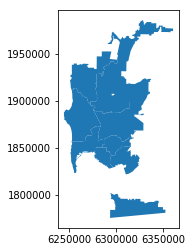

In [4]:
divisions.plot()

In [5]:
beats

,objectid,beat,div,serv,name,geometry
0,2,116,1,110,BAY PARK,"POLYGON ((6269942.126000002 1876454.879999995,..."
1,5,524,5,520,CORE-COLUMBIA,"POLYGON ((6278388.999750003 1842955, 6278678 1..."
2,37,811,8,810,NORMAL HEIGHTS,"POLYGON ((6297474 1858581, 6297511 1858580, 62..."
3,42,322,3,320,ALLIED GARDENS,"POLYGON ((6311032.696999997 1874322.528999999,..."
4,44,812,8,810,BURLINGAME,"POLYGON ((6292488.539000005 1846444, 6292486 1..."
...,...,...,...,...,...,...
136,626,821,8,820,ROLANDO,"POLYGON ((6314671.792500004 1857481.413249999,..."
137,627,713,7,710,OTAY MESA,"POLYGON ((6335607.172749996 1792523.013249993,..."
138,639,234,2,230,RANCHO BERNARDO,"POLYGON ((6297682.310499996 1972939.447750002,..."
139,640,312,3,310,TIERRASANTA,"POLYGON ((6327439.323500007 1893869.944000006,..."


In [6]:
beats.groupby('div').size()

div
0     4
1    14
2    11
3    13
4    19
5    19
6    16
7    15
8    23
9     7
dtype: int64

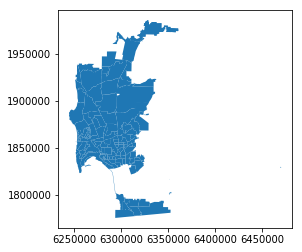

In [7]:
beats.plot()

In [8]:
distribution

,serv,arrests
0,130,7
1,520,1750
2,530,79
3,930,2072
4,810,1066
...,...,...
17,110,2074
18,240,1281
19,630,21
20,120,1818


In [9]:
beats2 = beats.copy()

In [10]:
beats2 = beats2[['div', 'serv']]
# Only care about one appearance of each serv
grouped = beats2.groupby('serv').first()
beats3 = grouped[['div']]
beats3

,div
serv,
0,0
110,1
120,1
230,2
240,2
...,...
720,7
810,8
820,8


In [11]:
beats4 = beats3.join(distribution.set_index('serv'), on='serv')
beats4

,div,arrests
serv,,
0,0,NaN
110,1,2074.0
120,1,1818.0
230,2,1104.0
240,2,1281.0
...,...,...
720,7,1456.0
810,8,1066.0
820,8,972.0


In [12]:
# Fill in the empty values with 0, and cast to int
beats4[['arrests']] = beats4[['arrests']].fillna(0).astype(int)

In [17]:
beats5 = beats4.groupby('div').sum()
beats5

,arrests
div,
0,0
1,3892
2,2385
3,4273
4,2561
5,3259
6,2215
7,3594
8,2894


In [18]:
divsums = divisions.join(beats5, on='div_num')
divsums

,objectid,div_num,div_name,geometry,arrests
0,1,1,NORTHERN,"POLYGON ((6257399.473922551 1913720.405154973,...",3892
1,2,2,NORTHEASTERN,"POLYGON ((6329136.046000302 1985638.385990649,...",2385
2,3,3,EASTERN,"POLYGON ((6321693.529061213 1885496.922888145,...",4273
3,4,5,CENTRAL,"POLYGON ((6287304.000071391 1850636.00015606, ...",3259
4,5,6,WESTERN,"POLYGON ((6280788.357918963 1873275.705860808,...",2215
5,6,7,SOUTHERN,"POLYGON ((6294084.232901976 1801858.102961391,...",3594
6,7,8,MID-CITY,"POLYGON ((6300695.999862134 1863112.000138387,...",2894
7,8,9,NORTHWESTERN,"POLYGON ((6290347.458551392 1952824.477209151,...",2072
8,9,4,SOUTHEASTERN,"POLYGON ((6314753.249962807 1851441.907993063,...",2561


0     Annotation(6.26293e+06, 1.88254e+06, 'Northern')
1    Annotation(6.30719e+06, 1.92606e+06, 'Northeas...
2      Annotation(6.30493e+06, 1.87686e+06, 'Eastern')
3      Annotation(6.28675e+06, 1.84079e+06, 'Central')
4       Annotation(6.2684e+06, 1.85211e+06, 'Western')
5     Annotation(6.31917e+06, 1.78645e+06, 'Southern')
6     Annotation(6.29965e+06, 1.85404e+06, 'Mid-city')
7    Annotation(6.2719e+06, 1.92608e+06, 'Northwest...
8    Annotation(6.30992e+06, 1.83743e+06, 'Southeas...
dtype: object

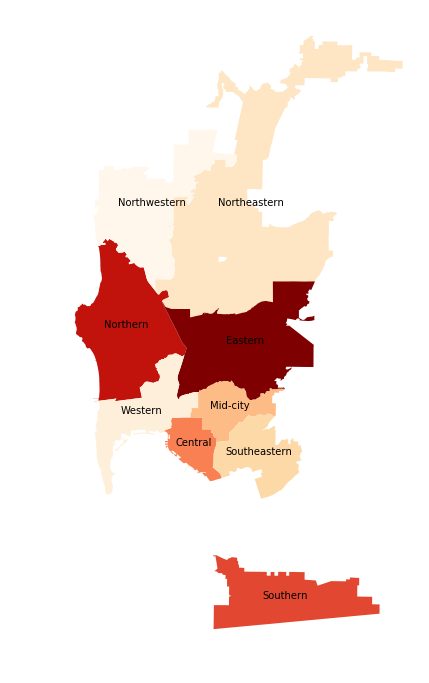

In [24]:
ax = divsums.plot(column='arrests', figsize=(30, 12), cmap='OrRd')
ax.set_axis_off()
divsums.apply(lambda x: ax.annotate(s=x.div_name.capitalize(), xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

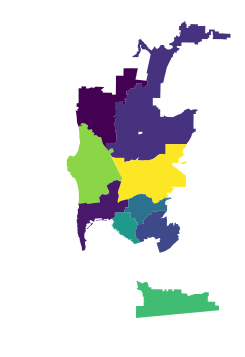

In [16]:
ax = divsums.plot(column='arrests', figsize=(15, 6))
ax.set_axis_off()